# CS 773 Data Mining and Security

## Course Project - Analyzing Open University Learning Analytics Dataset 

### Problem Statement 

Based on the given data of students enrolled in various courses identify the student who is at-risk so that suitable interventions can be taken to help students succeed. 

***Part-2 : Exploratory Data Analysis (EDA)***

In this part we visualize the data to gain insights and find patterns in the data.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading Data
student_info = pd.read_csv('../data/studentInfo.csv')
student_assessment = pd.read_csv('../data/studentAssessment.csv')
student_registration = pd.read_csv('../data/studentRegistration.csv')
student_vle = pd.read_csv('../data/studentVle.csv')
assessments = pd.read_csv('../data/assessments.csv')
courses = pd.read_csv('../data/courses.csv')
vle = pd.read_csv('../data/vle.csv')

#check for the data
print('----- Rows -----')
print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

----- Rows -----
Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


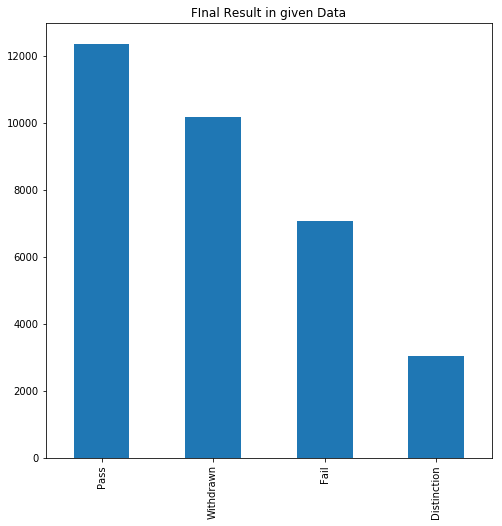

In [66]:
# we want to see how many students pass or fail in the previous data
print(student_info['final_result'].value_counts())
student_info['final_result'].value_counts().plot(kind='bar', title='FInal Result in given Data', figsize=(8,8))
plt.show()

***We can see that out of 32593, 10156 students have withdrawn from the courses. from this we could draw an inference for withdrawn students i.e. need to check if withdrawn students have taken any other courses in that semester or not.***

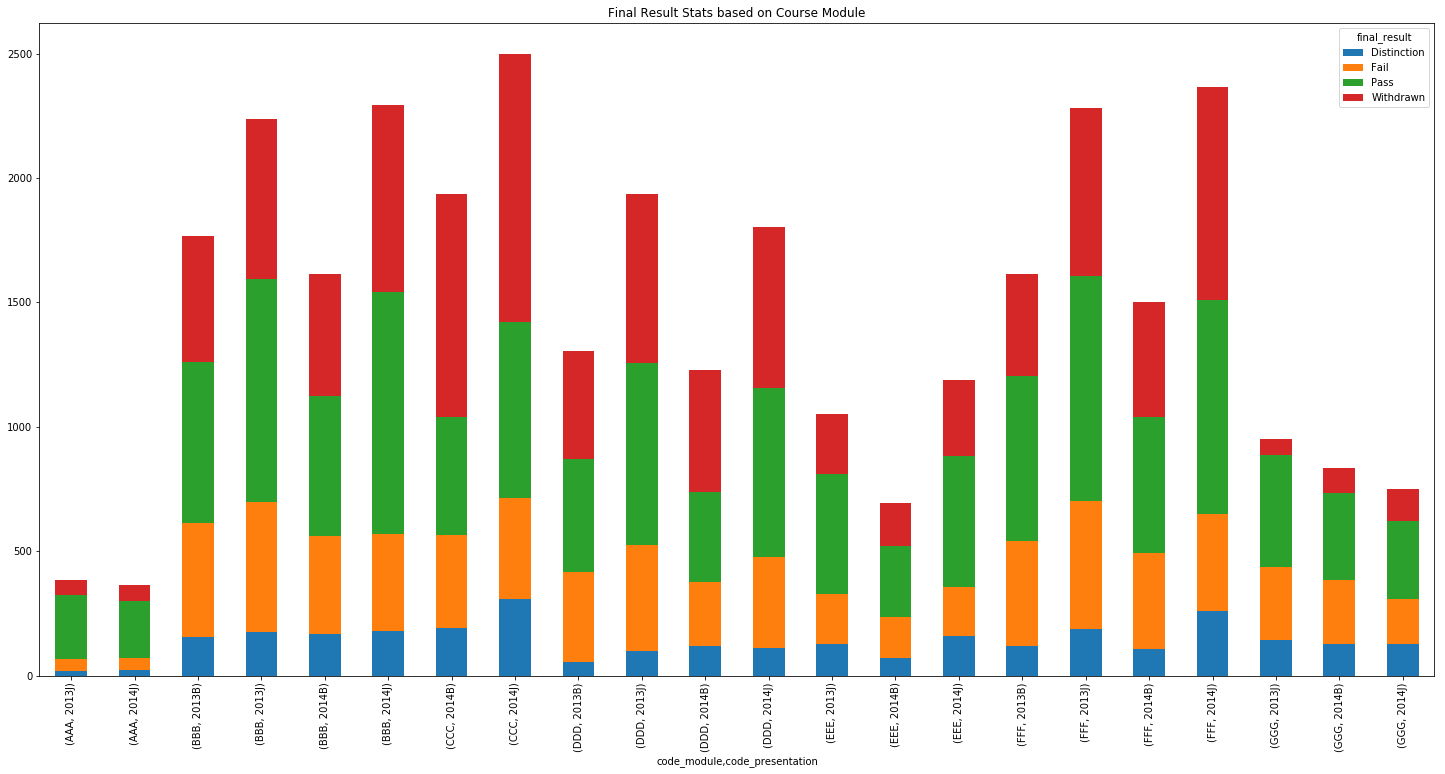

In [64]:
# get the students final result as per the course
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', stacked=True, title='Final Result Stats based on Course Module',figsize=(25,12))
#student_info.groupby(['code_module','code_presentation','final_result']).size()
#final_result_stats.plot(kind='bar', x = 'code_module')
plt.show()

***As stacked bar graphs are confusing to infer i have used unstacked bar graph to show the stats***

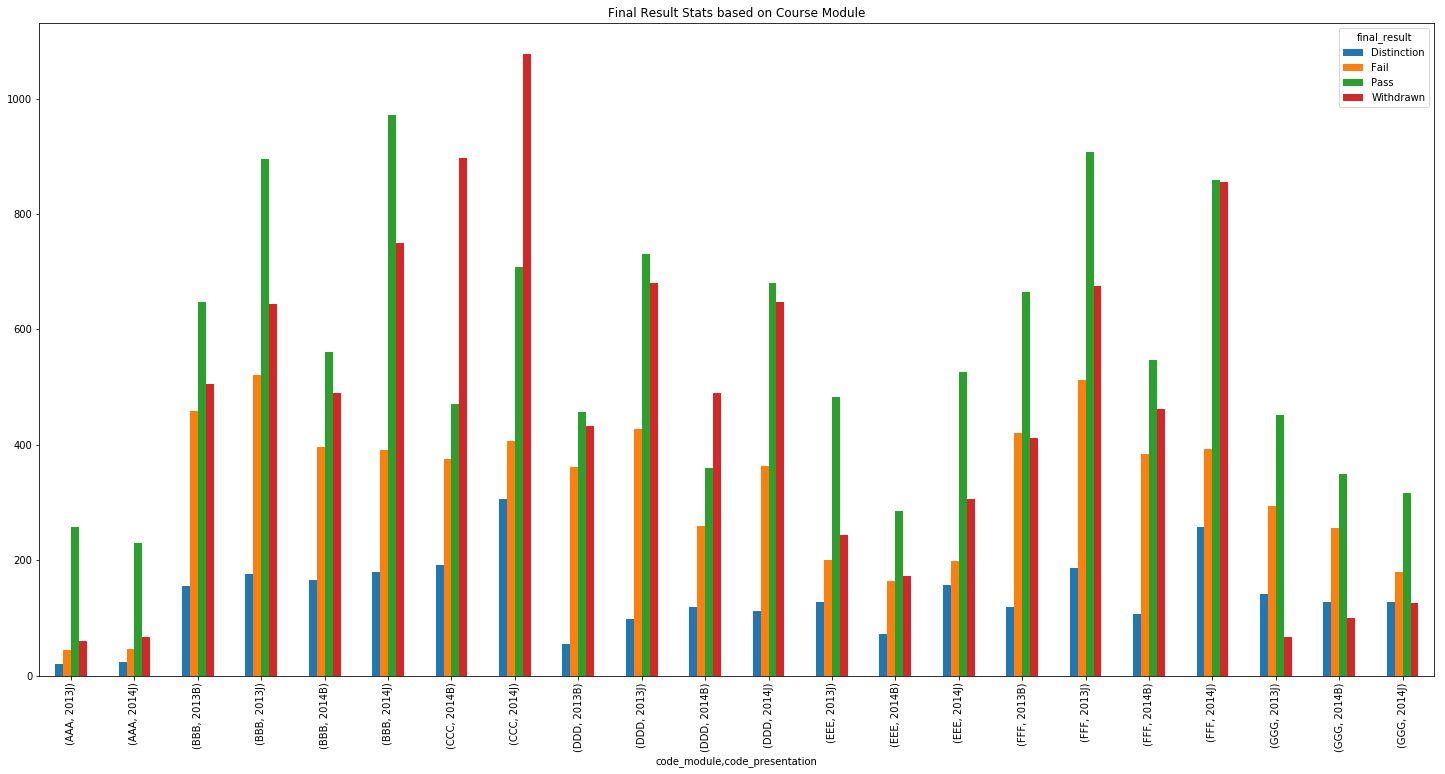

In [67]:
student_info.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
plt.show()

##### Insights from above Graph (Final Results Based on Course Module, Course_presentation) #####
- all courses have good pass percentage when compared to their registration rate
- courses AAA have less withdrawl rate
- For Course BBB the rate looks uniform for both years
- Withdrawl rate is high for CCC in both the offerings 2014B, 2014J, infact it increased in the later year along with students registered, i.e. more students got registered in course and nearly 40% of them withdrew from the course.
- For course DDD the rate of change is uniform in all offerings
- Course EEE has third less withdrawl rate compared to all others, Failure rate is also less
- Course FFF withdrawl rate can be seen increasing based on past 2 years data, whereas other rates(Pass, Fail) remains uniform. 
- we can see that for Course GGG in 2013J withdrawl rate was less which has been increased in 2014B and 2014J, also number of students registering for the course are also decreasing
- From the above we can see that all the courses we have a good amount of students being withdrawn from the subjects reason unknown

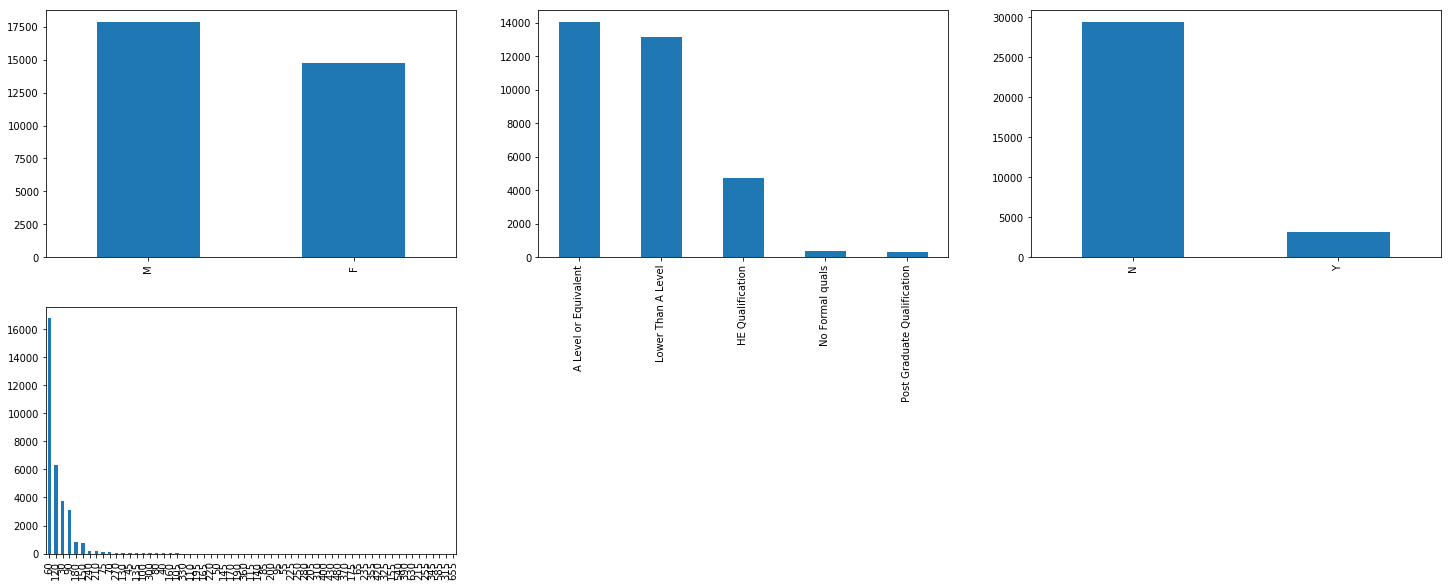

In [5]:
# Visualizing all the data
#-- gender
plt.figure(figsize=(25,10))
plt.subplot(231)
student_info['gender'].value_counts().plot.bar()
#-- higher Education
plt.subplot(232)
student_info['highest_education'].value_counts().plot.bar()
#--disability
plt.subplot(233)
student_info['disability'].value_counts().plot.bar()
#--Student credits
plt.subplot(234)
student_info['studied_credits'].value_counts().plot.bar()
